In [2]:
# Importing the required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

print(tf.__version__)

2.3.1


In [ ]:
##############################
########## SECTION 1 #########
#### LOADING THE DATASET ####
############################

In [3]:
# load_data returns tuples of training and test data sets
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [4]:
# Printing shape of the data
print("X_train shape: {}   X_test shape {}".format(X_train.shape, X_test.shape))
print("Y_train shape: {}   Y_test shape {}".format(y_train.shape, y_test.shape))

X_train shape: (60000, 28, 28)   X_test shape (10000, 28, 28)
Y_train shape: (60000,)   Y_test shape (10000,)


In [5]:
X_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [6]:
# Labels
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

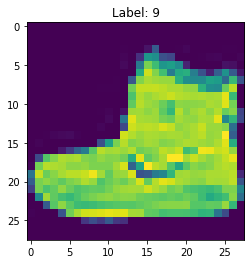

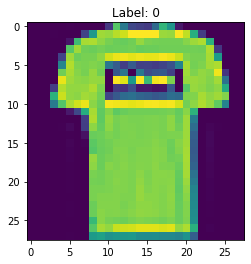

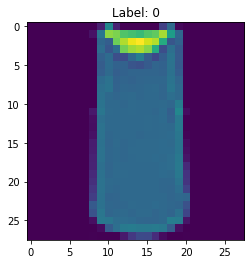

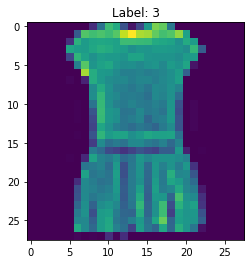

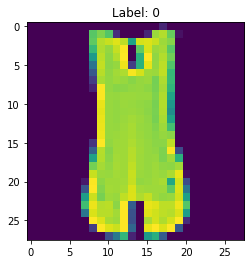

<Figure size 432x288 with 0 Axes>

In [7]:
# Looking at images in training set
N = 5
plt.subplot()

# Looping through the first 5 images in the data and plotting them out
for i in range(0, N):
    plt.imshow(X_train[i])
    plt.title("Label: {}".format(y_train[i]))
    plt.figure()
plt.show()

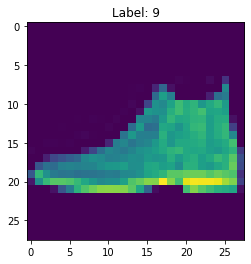

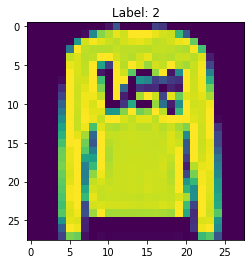

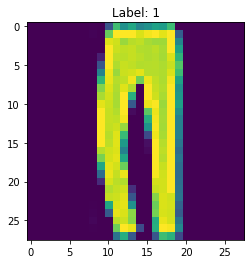

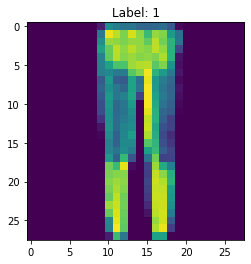

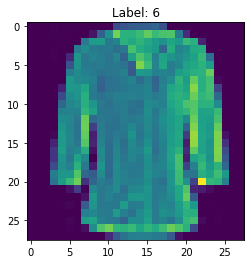

<Figure size 432x288 with 0 Axes>

In [8]:
# Looking at images in test set
N = 5
plt.subplot()
for i in range(0, N):
    plt.imshow(X_test[i])
    plt.title("Label: {}".format(y_test[i]))
    plt.figure()
plt.show()

In [9]:
# Pixel values are between 0 and 255
# Normalize our data so that pixels are between 1 and 0
X_train = X_train/255
X_test = X_test/255

In [11]:
# Defining Model using Sequential API
model = Sequential()
# First layer the input layer
model.add(Flatten(input_shape=(28, 28)))
# Second layer - 1st hidden
model.add(Dense(32, activation='relu'))
# Third layer - 2nd hidden
model.add(Dense(64, activation='relu'))
# Fourth layer - Output layer
model.add(Dense(10, activation='softmax'))

In [28]:
# Printing out the model summary
model.summary()

SyntaxError: invalid syntax (<ipython-input-28-22b1e5bf7f6f>, line 1)

In [13]:
# Compiling the model 
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [14]:
# Training the model
r = model.fit(X_train, y_train, validation_split=0.2, epochs=20)

Epoch 1/20
1500/1500 [==============================] - 19s 12ms/step - loss: 0.5621 - accuracy: 0.8015 - val_loss: 0.4398 - val_accuracy: 0.8451
Epoch 2/20
1500/1500 [==============================] - 14s 10ms/step - loss: 0.4148 - accuracy: 0.8520 - val_loss: 0.4040 - val_accuracy: 0.8528
Epoch 3/20
1500/1500 [==============================] - 9s 6ms/step - loss: 0.3740 - accuracy: 0.8649 - val_loss: 0.3728 - val_accuracy: 0.8659
Epoch 4/20
1500/1500 [==============================] - 8s 5ms/step - loss: 0.3478 - accuracy: 0.8721 - val_loss: 0.4038 - val_accuracy: 0.8513
Epoch 5/20
1500/1500 [==============================] - 5s 4ms/step - loss: 0.3316 - accuracy: 0.8780 - val_loss: 0.3988 - val_accuracy: 0.8550
Epoch 6/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3195 - accuracy: 0.8826 - val_loss: 0.3661 - val_accuracy: 0.8683
Epoch 7/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3077 - accuracy: 0.8858 - val_loss: 0.3676 - val_accur

In [ ]:
# Plot loss
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

In [ ]:
# Plot accuracy
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [17]:
# Making Prediction
pred = model.predict(X_test)

In [ ]:
# Evaluate the model
# 0.376, my bad
print(model.evaluate(X_test, y_test))

In [ ]:
# N by D
pred.shape

In [20]:
pred

array([[3.0743874e-07, 2.4130198e-09, 5.8743009e-08, ..., 1.3132013e-03,
        6.0644830e-08, 9.9864227e-01],
       [1.2876042e-05, 3.8844025e-11, 9.9411148e-01, ..., 9.8948761e-17,
        3.1458535e-07, 1.1513126e-15],
       [3.1025169e-11, 1.0000000e+00, 5.1416520e-16, ..., 9.0303972e-29,
        3.6545945e-17, 2.2698728e-25],
       ...,
       [3.4889479e-07, 6.0817365e-14, 2.3135662e-08, ..., 6.2943158e-11,
        9.9999952e-01, 1.5027397e-17],
       [6.9159285e-08, 9.9999726e-01, 5.5942351e-10, ..., 3.1821062e-17,
        2.2494749e-11, 1.0263906e-14],
       [5.9208734e-05, 1.4731684e-07, 8.8395762e-05, ..., 3.1932082e-04,
        6.2349875e-04, 9.6812698e-08]], dtype=float32)

In [21]:
# We want the label with highest probability, rather than the probabilities attached to each label
# The command argmax with axis does that 
pred = np.argmax(pred, axis=1)

In [ ]:
pred.shape

In [ ]:
pred

In [24]:
# misclassified will store the index at which misclassification happens
misclassified = []
for i in range(0, len(pred)):
    if(pred[i] != y_test[i]):
        misclassified.append(i)

In [31]:
# 1275 pred wrong. My bad.
len(misclassified)

1275

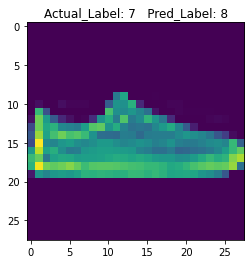

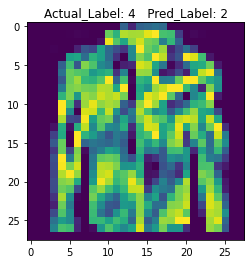

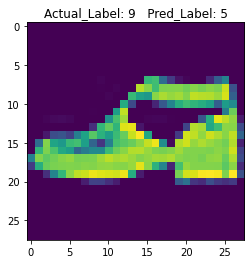

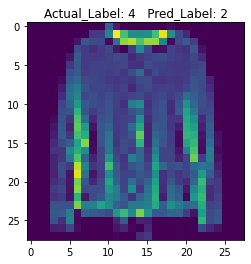

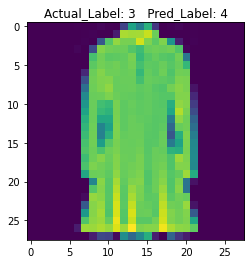

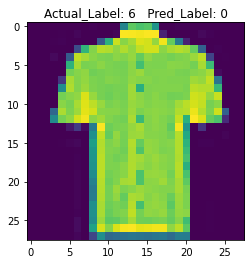

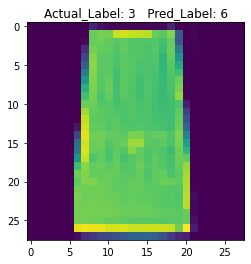

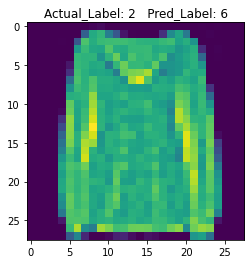

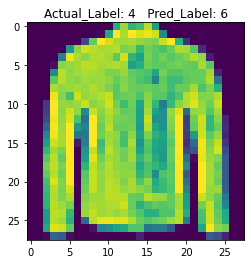

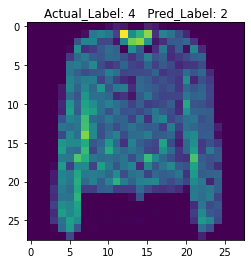

<Figure size 432x288 with 0 Axes>

In [26]:
# Looking at 10 misclassifed images
N = 10
plt.subplot()
for i in range(0, N):
    plt.imshow(X_test[misclassified[i]])
    plt.title("Actual_Label: {}   Pred_Label: {}".format(y_test[misclassified[i]], pred[misclassified[i]]))
    plt.figure()
plt.show()